# Rasch model fit check


In [1]:
# Import libraries

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # For plotting

import sys, os                  # For adding the RaschPy library to the path

sys.path.append(os.path.abspath("C:/Users/brf337/Desktop/Rasch package/RaschPy"))
import RaschFunctions as rf # Loading Rasch functions library


sys.path.append(os.path.abspath("C:/Users/brf337/Desktop/Rasch package/RaschPy/RaschPy"))
import __init__ as Rasch # Loading the RaschPy library


In [2]:
# Load csv file
df = pd.read_csv('C:/Users/brf337/Desktop/Rasch package/data.csv', sep = "\t")
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,gender,age,source,country
0,3,3,1,4,3,4,3,2,3,3,1,40,1,US
1,4,4,1,3,1,3,3,2,3,2,1,36,1,US
2,2,3,2,3,3,3,2,3,3,3,2,22,1,US
3,4,3,2,3,2,3,2,3,3,3,1,31,1,US
4,4,4,1,4,1,4,4,1,1,1,1,30,1,EU


### Objective of this script
In this script we wish to check how model validation works in Python and if it aligns with R. We first look at a real data set containing data collected online with an interactive version of the the Rosenberg Self-Esteem Scale. To test the model validation tools for the Rasch model we dichotomize the data:

In [3]:
# Dichotomize the first 10 columns of the dataframe
df_dichotomized = rf.dichotomize_data(df, 2, ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"])

#Dichotomized question data (DQD)
DQD = df_dichotomized.iloc[:, 0:10]
DQD.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,1,0,1,1,1,1,0,1,1
1,1,1,0,1,0,1,1,0,1,0
2,0,1,0,1,1,1,0,1,1,1
3,1,1,0,1,0,1,0,1,1,1
4,1,1,0,1,0,1,1,0,0,0


Having prepared the data to be dichotomized and only include the response columns we construct an SML object and fit the Rasch model to the data.

In [4]:
RaschFit = Rasch.SLM(DQD)
RaschFit.item_stats_df(full=True)
RaschFit.item_stats

C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:1266: RuntimeWarning: invalid value encountered in sqrt
  self.psi = (np.sqrt(np.var(self.person_abilities) - (self.rsem_vector ** 2).mean()) /


,Estimate,SE,2.5%,97.5%,Count,Facility,Infit MS,Infit Z,Outfit MS,Outfit Z,Discrim,PM corr,Exp PM corr
Q1,-0.616,0.009,-0.633,-0.599,47974,0.755,0.901,-21.345,0.861,-24.095,1.216,0.317,0.219
Q2,-1.034,0.010,-1.056,-1.018,47974,0.819,0.862,-21.721,0.787,-27.459,1.189,0.341,0.198
Q3,0.790,0.008,0.776,0.806,47974,0.401,1.011,3.966,1.022,6.880,0.926,0.248,0.248
Q4,-0.493,0.009,-0.511,-0.478,47974,0.732,0.920,-19.099,0.901,-18.632,1.200,0.301,0.224
Q5,0.552,0.008,0.538,0.569,47974,0.458,0.999,-0.210,1.004,1.292,0.996,0.282,0.249
Q6,0.411,0.008,0.394,0.423,47974,0.533,1.076,31.271,1.071,25.600,0.460,0.172,0.248
Q7,0.623,0.008,0.606,0.637,47974,0.481,1.096,36.795,1.092,30.924,0.390,0.159,0.249
Q8,-0.082,0.010,-0.098,-0.064,47974,0.618,0.936,-21.900,0.917,-22.875,1.311,0.380,0.239
Q9,-0.299,0.008,-0.314,-0.287,47974,0.658,0.901,-28.235,0.849,-34.696,1.360,0.450,0.231
Q10,0.148,0.009,0.132,0.167,47974,0.560,0.926,-29.837,0.907,-31.371,1.490,0.407,0.244


We consider the `Infit MS`, `Outfit MS` and `Infit Z`, `Outfit Z` values to determine if the model fits the data. We note that Q3, Q5, Q6 and Q7 have quite high `Infit Z` and `Outfit Z` scores compared to the other questions.

# Simulated data
In addition to the model validation on a real data set, we also test how model validation works on a simulated data set. We have simulated data in R. All items except item 3 and 9 are generated according to the Rasch model, so the Rasch model should fit these items well. Responses to item 3 and 9 are randomly generated from a binomial distribution with $p = 0.5$.

In [5]:
# Load data with misspecified items
SML_sim_mis = pd.read_csv('C:/Users/brf337/Desktop/Rasch package/SML_sim_mis.csv', sep = ",")
SML_sim_mis = SML_sim_mis.iloc[:, 1:11]
SML_sim_mis.head()

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10
0,0,1,0,1,0,0,1,0,1,0
1,1,1,1,1,0,0,1,1,1,0
2,0,1,1,1,0,0,1,1,0,0
3,0,1,1,1,0,0,1,1,0,0
4,1,0,1,1,0,0,1,0,0,0


In [6]:
# Fit the Rasch model to the misspecified data
RaschFitMis = Rasch.SLM(SML_sim_mis)
RaschFitMis.item_stats_df(full=True)
RaschFitMis.item_stats

,Estimate,SE,2.5%,97.5%,Count,Facility,Infit MS,Infit Z,Outfit MS,Outfit Z,Discrim,PM corr,Exp PM corr
item1,0.865,0.071,0.727,1.005,1000,0.303,0.854,-4.747,0.800,-4.172,1.313,0.502,0.371
item2,-1.992,0.090,-2.174,-1.833,1000,0.852,0.856,-2.670,0.853,-1.591,1.139,0.392,0.312
item3,-0.027,0.068,-0.153,0.096,1000,0.492,1.114,4.459,1.152,4.232,0.604,0.298,0.395
item4,-1.032,0.069,-1.154,-0.910,1000,0.700,0.863,-4.278,0.815,-3.736,1.276,0.505,0.373
item5,1.470,0.078,1.339,1.619,1000,0.199,0.902,-2.267,0.838,-2.250,1.135,0.390,0.335
item6,1.830,0.094,1.670,2.064,1000,0.150,0.855,-2.766,0.841,-1.763,1.139,0.370,0.309
item7,-2.901,0.144,-3.170,-2.666,1000,0.937,0.824,-1.979,0.721,-1.903,1.100,0.242,0.238
item8,0.397,0.067,0.281,0.546,1000,0.399,0.865,-5.348,0.829,-4.665,1.401,0.524,0.389
item9,-0.021,0.072,-0.166,0.111,1000,0.499,1.143,5.550,1.180,4.955,0.511,0.273,0.395
item10,1.411,0.081,1.255,1.564,1000,0.208,0.850,-3.639,0.772,-3.373,1.213,0.447,0.339


We note that `item3` and `item9` have higher `Infit Z` and `Outfit Z` scores than the rest of the items. 

In [7]:
RaschFitMis.item_stats[["Outfit MS", "Infit MS"]].max()

Outfit MS    1.180
Infit MS     1.143
dtype: float64

# Simulation study
We run a simulation study using the function library from `RaschFunctions.py`:

In [8]:
rf.run_InfitOutfit_simulation_study(n_simulations=5, n_persons = 100, k_items = 10)

,Min Infit MS,Min Outfit MS,Max Infit MS,Max Outfit MS
0,0.861,0.760,1.010,1.086
0,0.831,0.703,1.197,1.524
0,0.819,0.621,1.065,1.238
0,0.810,0.579,1.096,1.333
0,0.756,0.685,1.037,1.045


In [8]:
n_person__list = [100, 150, 200, 250, 300, 350, 400, 600, 800, 1000, 1500, 2000]
result_list = []

manual_diffs = [1, -2, 0.5, -1, 1.5, 2, -3, 0.5, -1, 1.5]

for n_persons in n_person__list:
    print(n_persons)
    result_list.append(rf.run_InfitOutfit_simulation_study(n_simulations=1000, n_persons = n_persons, k_items = 10, manual_diffs=manual_diffs))

100
150
200
250
300
350
400
600
800
1000
1500
2000


In [10]:
result_list[1]["Min Infit MS"].quantile([0.05, 0.1])

0.05    0.75895
0.10    0.76880
Name: Min Infit MS, dtype: float64

In [9]:
quantile_probs = [0.025, 0.05, 0.1, 0.9, 0.95, 0.975]
quantilesdflist = [result_list[i].quantile(quantile_probs) for i in range(len(result_list))]
quantilesdflist

[       Min Infit MS  Min Outfit MS  Max Infit MS  Max Outfit MS
 0.025      0.648975       0.288925      0.957000       0.918975
 0.050      0.666950       0.316800      0.967000       0.942950
 0.100      0.700000       0.376800      0.981000       0.972000
 0.900      0.815100       0.639000      1.131000       1.476100
 0.950      0.829000       0.667050      1.163000       1.603300
 0.975      0.841000       0.693000      1.188025       1.763500,
        Min Infit MS  Min Outfit MS  Max Infit MS  Max Outfit MS
 0.025      0.684975       0.364975       0.94000        0.91500
 0.050      0.704950       0.400000       0.95000        0.93100
 0.100      0.729900       0.442000       0.96500        0.96100
 0.900      0.833000       0.674100       1.08500        1.35000
 0.950      0.843000       0.692050       1.11305        1.45910
 0.975      0.854025       0.706025       1.13700        1.61305,
        Min Infit MS  Min Outfit MS  Max Infit MS  Max Outfit MS
 0.025      0.720000   

In [10]:
# Extract statistics into separate DataFrames
stat_names = quantilesdflist[0].columns

# Dictionary to store results
stat_dfs = {}

for stat in stat_names:
    data = {
        'n': n_person__list,
        '0.025 quantile': [df.loc[0.025, stat] for df in quantilesdflist],
        '0.050 quantile': [df.loc[0.050, stat] for df in quantilesdflist],
        '0.100 quantile': [df.loc[0.100, stat] for df in quantilesdflist],
        '0.900 quantile': [df.loc[0.900, stat] for df in quantilesdflist],
        '0.950 quantile': [df.loc[0.950, stat] for df in quantilesdflist],
        '0.975 quantile': [df.loc[0.975, stat] for df in quantilesdflist]
    }
    stat_dfs[stat] = pd.DataFrame(data)

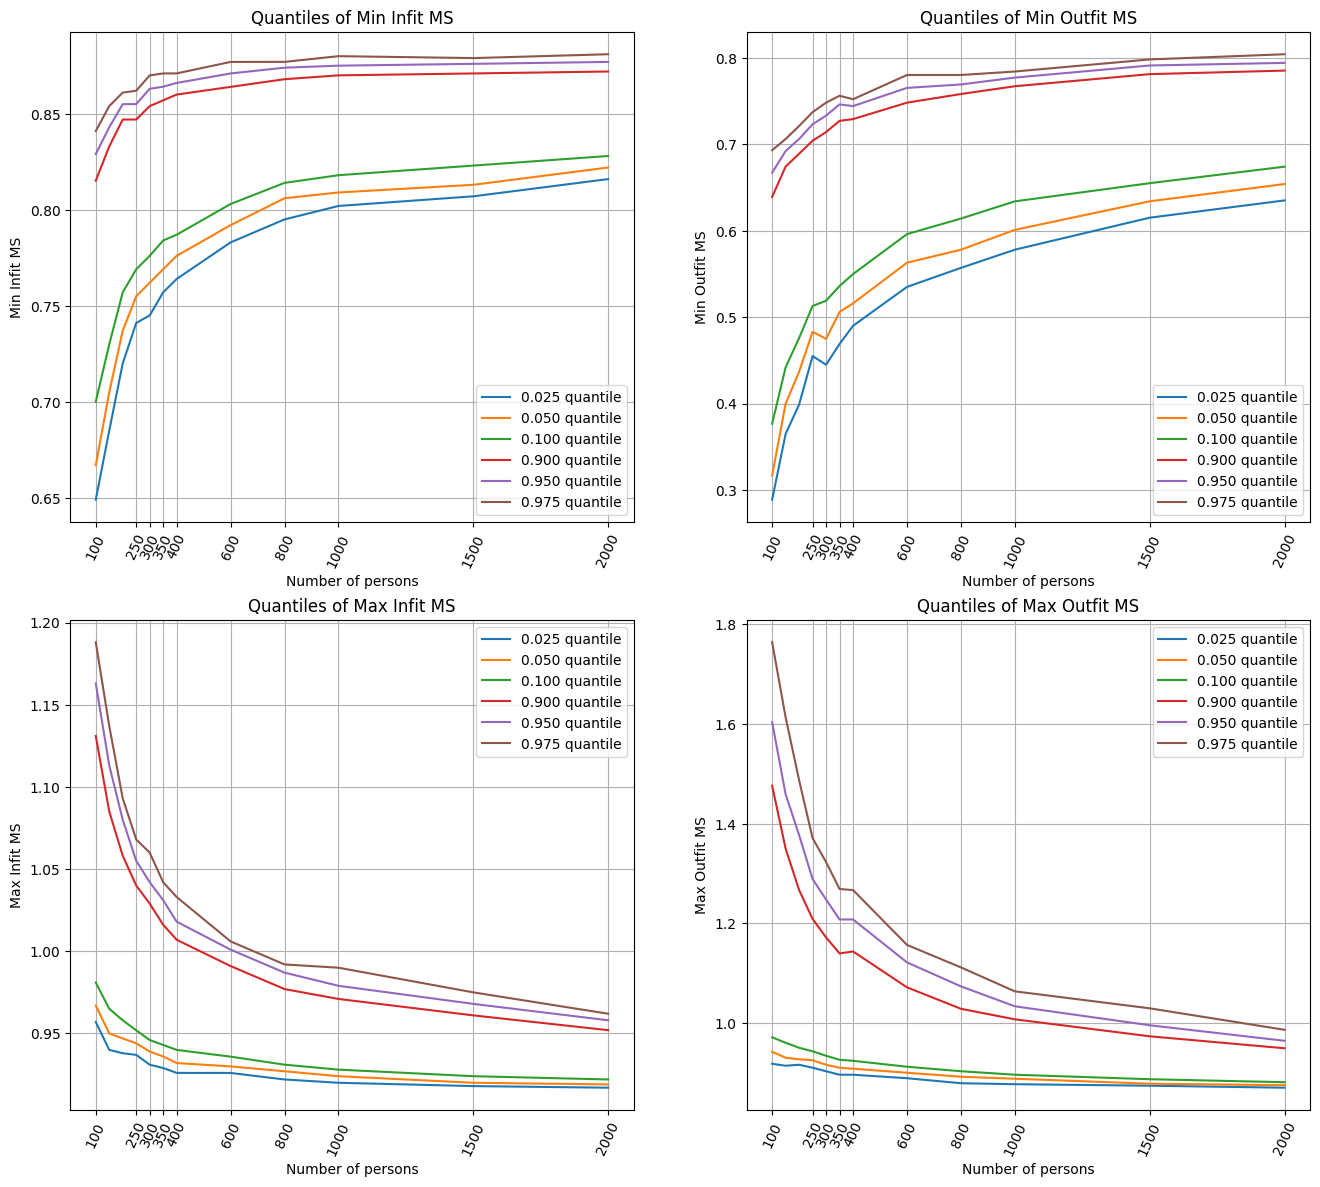

In [15]:
filtered_list = [n_person__list[i] for i in range(len(n_person__list)) if i not in [1, 2]]

plt.figure(figsize=(16, 14))

plt.subplot(2, 2, 3)
plt.plot(stat_dfs["Max Infit MS"]["n"], stat_dfs["Max Infit MS"]["0.025 quantile"])
plt.plot(stat_dfs["Max Infit MS"]["n"], stat_dfs["Max Infit MS"]["0.050 quantile"])
plt.plot(stat_dfs["Max Infit MS"]["n"], stat_dfs["Max Infit MS"]["0.100 quantile"])
plt.plot(stat_dfs["Max Infit MS"]["n"], stat_dfs["Max Infit MS"]["0.900 quantile"])
plt.plot(stat_dfs["Max Infit MS"]["n"], stat_dfs["Max Infit MS"]["0.950 quantile"])
plt.plot(stat_dfs["Max Infit MS"]["n"], stat_dfs["Max Infit MS"]["0.975 quantile"])
plt.legend(["0.025 quantile", "0.050 quantile", "0.100 quantile", "0.900 quantile", "0.950 quantile", "0.975 quantile"])
plt.xlabel("Number of persons")
plt.xticks(filtered_list, rotation=65)
plt.ylabel("Max Infit MS")
plt.title("Quantiles of Max Infit MS")
plt.grid()


plt.subplot(2, 2, 1)
plt.plot(stat_dfs["Min Infit MS"]["n"], stat_dfs["Min Infit MS"]["0.025 quantile"])
plt.plot(stat_dfs["Min Infit MS"]["n"], stat_dfs["Min Infit MS"]["0.050 quantile"])
plt.plot(stat_dfs["Min Infit MS"]["n"], stat_dfs["Min Infit MS"]["0.100 quantile"])
plt.plot(stat_dfs["Min Infit MS"]["n"], stat_dfs["Min Infit MS"]["0.900 quantile"])
plt.plot(stat_dfs["Min Infit MS"]["n"], stat_dfs["Min Infit MS"]["0.950 quantile"])
plt.plot(stat_dfs["Min Infit MS"]["n"], stat_dfs["Min Infit MS"]["0.975 quantile"])
plt.legend(["0.025 quantile", "0.050 quantile", "0.100 quantile", "0.900 quantile", "0.950 quantile", "0.975 quantile"])
plt.xlabel("Number of persons")
plt.xticks(filtered_list, rotation=65)
plt.ylabel("Min Infit MS")
plt.title("Quantiles of Min Infit MS")
plt.grid()


plt.subplot(2, 2, 4)
plt.plot(stat_dfs["Max Outfit MS"]["n"], stat_dfs["Max Outfit MS"]["0.025 quantile"])
plt.plot(stat_dfs["Max Outfit MS"]["n"], stat_dfs["Max Outfit MS"]["0.050 quantile"])
plt.plot(stat_dfs["Max Outfit MS"]["n"], stat_dfs["Max Outfit MS"]["0.100 quantile"])
plt.plot(stat_dfs["Max Outfit MS"]["n"], stat_dfs["Max Outfit MS"]["0.900 quantile"])
plt.plot(stat_dfs["Max Outfit MS"]["n"], stat_dfs["Max Outfit MS"]["0.950 quantile"])
plt.plot(stat_dfs["Max Outfit MS"]["n"], stat_dfs["Max Outfit MS"]["0.975 quantile"])
plt.legend(["0.025 quantile", "0.050 quantile", "0.100 quantile", "0.900 quantile", "0.950 quantile", "0.975 quantile"])
plt.xlabel("Number of persons")
plt.xticks(filtered_list, rotation=65)
plt.ylabel("Max Outfit MS")
plt.title("Quantiles of Max Outfit MS")
plt.grid()


plt.subplot(2, 2, 2)
plt.plot(stat_dfs["Min Outfit MS"]["n"], stat_dfs["Min Outfit MS"]["0.025 quantile"])
plt.plot(stat_dfs["Min Outfit MS"]["n"], stat_dfs["Min Outfit MS"]["0.050 quantile"])
plt.plot(stat_dfs["Min Outfit MS"]["n"], stat_dfs["Min Outfit MS"]["0.100 quantile"])
plt.plot(stat_dfs["Min Outfit MS"]["n"], stat_dfs["Min Outfit MS"]["0.900 quantile"])
plt.plot(stat_dfs["Min Outfit MS"]["n"], stat_dfs["Min Outfit MS"]["0.950 quantile"])
plt.plot(stat_dfs["Min Outfit MS"]["n"], stat_dfs["Min Outfit MS"]["0.975 quantile"])
plt.legend(["0.025 quantile", "0.050 quantile", "0.100 quantile", "0.900 quantile", "0.950 quantile", "0.975 quantile"])
plt.xlabel("Number of persons")
plt.xticks(filtered_list, rotation=65)
plt.ylabel("Min Outfit MS")
plt.title("Quantiles of Min Outfit MS")
plt.grid()

plt.savefig("C:/Users/brf337/Desktop/Rasch package/Rasch-models-in-Python-and-R/Python code/Plots/infitoutfitsimPython.png")

plt.show()